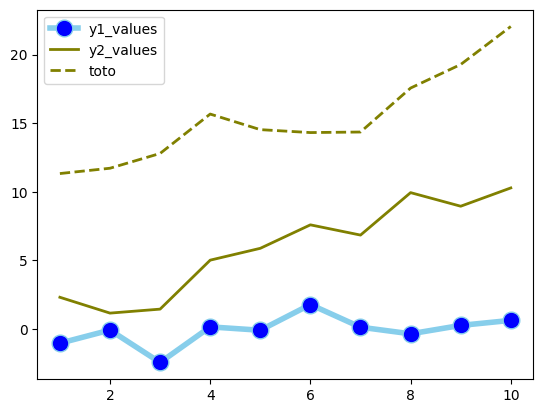

   x_values  y1_values  y2_values  y3_values
0         1  -1.027848   2.318122  11.331591
1         2  -0.072073   1.163678  11.718586
2         3  -2.432793   1.453831  12.795302
3         4   0.160710   5.021656  15.665796
4         5  -0.083649   5.884742  14.530387
5         6   1.788161   7.594745  14.317130
6         7   0.137697   6.848697  14.356942
7         8  -0.344625   9.941351  17.560842
8         9   0.268493   8.950893  19.277494
9        10   0.634958  10.284318  22.046199


In [185]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# Data
df=pd.DataFrame({'x_values': range(1,11), 'y1_values': np.random.randn(10), 'y2_values': np.random.randn(10)+range(1,11), 'y3_values': np.random.randn(10)+range(11,21) })
 
# multiple line plots
plt.plot( 'x_values', 'y1_values', data=df, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'x_values', 'y2_values', data=df, marker='', color='olive', linewidth=2)
plt.plot( 'x_values', 'y3_values', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")

# show legend
plt.legend()

# show graph
plt.show()
print(df)

In [186]:
def getThreadData(df,thread):
    return df[df['Threads']==thread]
def getBatchData(df,batch):
    return df[df['Batch Size']==batch]
def getModelData(df,model):
    return df[df['Model']==model]
def preProcData(df,model,label):
    #df = getThreadData(df,thread)
    df = getModelData(df,model)
    df[label] = df['Avg Time'] * 1000000
    return df
def getBatchData_sgx(batch, thread, model):
    sgx_data = pd.read_csv('results_'+str(thread)+'/result.csv')
    sgx_data = getBatchData(sgx_data,batch)
    sgx_data = preProcData(sgx_data,model,'sgx')
    sgx_data['Threads'] = thread
    return sgx_data

In [187]:
def plotComparisonGraph(thread,model):
    raw_data = pd.read_csv('results_raw/result.csv')
    raw_data = getThreadData(raw_data,thread)
    raw_data = preProcData(raw_data,model,'raw')
    print(raw_data)
    
    sgx_data = pd.read_csv('results_'+str(thread)+'/result.csv')
    sgx_data = preProcData(sgx_data,model,'sgx')
    print(sgx_data)
    
    merge_data = pd.merge(sgx_data,raw_data,how ='inner',left_on=['Batch Size'],right_on = ['Batch Size'])
    
    plt.plot(  'raw', data=merge_data, marker='o', markerfacecolor='red', markersize=12, color='red', linewidth=1)
    plt.plot(  'sgx', data=merge_data, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=1)
    
    plt.xticks(merge_data.index,merge_data['Batch Size'])
    
    plt.legend()
    #plt.yscale('log')
    plt.show()

In [188]:
def plotComparisonGraph_Thread(batch,model):
    raw_data = pd.read_csv('results_raw/result.csv')
    raw_data = getBatchData(raw_data,batch)
    raw_data = preProcData(raw_data,model,'raw')
    print(raw_data)
    
    sgx_data_1 = getBatchData_sgx(batch,1,model)
    sgx_data_4 = getBatchData_sgx(batch,4,model)
    sgx_data_16 = getBatchData_sgx(batch,16,model)
    
    sgx_data=pd.concat([sgx_data_1,sgx_data_4,sgx_data_16])
    print(sgx_data)
    
    merge_data = pd.merge(sgx_data,raw_data,how ='inner',left_on=['Threads'],right_on = ['Threads'])
    
    plt.plot(  'raw', data=merge_data, marker='o', markerfacecolor='red', markersize=12, color='red', linewidth=1)
    plt.plot(  'sgx', data=merge_data, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=1)
    
    plt.xticks(merge_data.index,merge_data['Threads'])
    
    plt.legend()
    #plt.yscale('log')
    plt.show()

# Performance comparison of two models

## Thread 1

  Model  Threads  Batch Size  Min Time  Max Time  Avg Time     raw
0   mlp        1           1  0.000056   0.00012  0.000063    62.5
1   mlp        1          16  0.000114   0.00014  0.000124   124.4
2   mlp        1        1024  0.000869   0.00159  0.001391  1391.1
  Model  Batch Size  Min Time  Max Time  Avg Time     sgx
0   mlp           1  0.000049  0.000081  0.000053    52.7
1   mlp          16  0.000115  0.000199  0.000125   125.5
2   mlp        1024  0.000908  0.001641  0.001470  1469.8


/var/folders/fz/lvlmmr5j7y100mbrz_71t22w0000gn/T/ipykernel_12259/1111661987.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[label] = df['Avg Time'] * 1000000
/var/folders/fz/lvlmmr5j7y100mbrz_71t22w0000gn/T/ipykernel_12259/1111661987.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[label] = df['Avg Time'] * 1000000


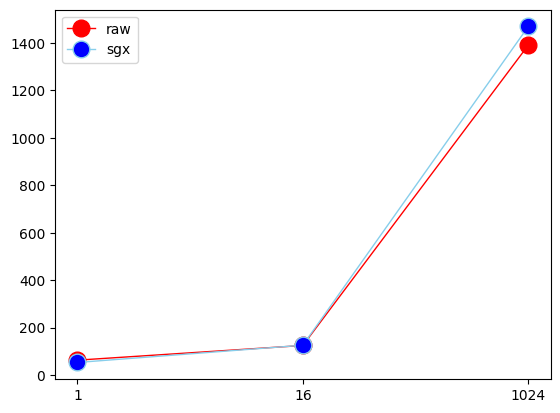

/var/folders/fz/lvlmmr5j7y100mbrz_71t22w0000gn/T/ipykernel_12259/1111661987.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[label] = df['Avg Time'] * 1000000
/var/folders/fz/lvlmmr5j7y100mbrz_71t22w0000gn/T/ipykernel_12259/1111661987.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[label] = df['Avg Time'] * 1000000


  Model  Threads  Batch Size  Min Time  Max Time  Avg Time      raw
3   cnn        1           1  0.000227  0.000300  0.000237    236.7
4   cnn        1          16  0.000706  0.001158  0.000734    733.8
5   cnn        1        1024  0.020067  0.054651  0.046661  46660.5
  Model  Batch Size  Min Time  Max Time  Avg Time      sgx
3   cnn           1  0.000246  0.000343  0.000259    259.1
4   cnn          16  0.000779  0.000900  0.000812    812.4
5   cnn        1024  0.025623  0.091179  0.043476  43476.2


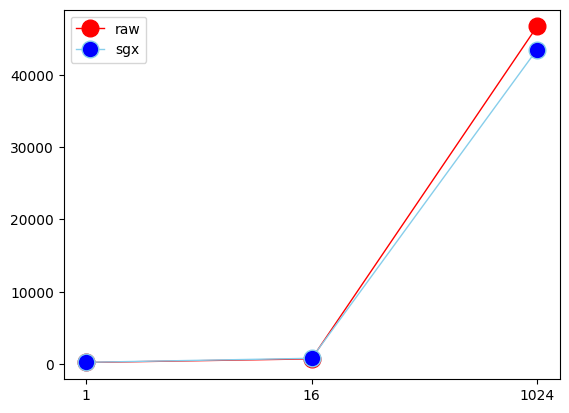

In [189]:
plotComparisonGraph(1,'mlp')
plotComparisonGraph(1,'cnn')

## Thread 4

  Model  Threads  Batch Size  Min Time  Max Time  Avg Time    raw
6   mlp        4           1  0.000041  0.000077  0.000046   46.3
7   mlp        4          16  0.000081  0.000097  0.000084   84.1
8   mlp        4        1024  0.000584  0.001581  0.000919  918.7
  Model  Batch Size  Min Time  Max Time  Avg Time     sgx
0   mlp           1  0.000100  0.000127  0.000103   103.5
1   mlp          16  0.000136  0.000180  0.000145   144.9
2   mlp        1024  0.000756  0.001790  0.001140  1140.2


/var/folders/fz/lvlmmr5j7y100mbrz_71t22w0000gn/T/ipykernel_12259/1111661987.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[label] = df['Avg Time'] * 1000000
/var/folders/fz/lvlmmr5j7y100mbrz_71t22w0000gn/T/ipykernel_12259/1111661987.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[label] = df['Avg Time'] * 1000000


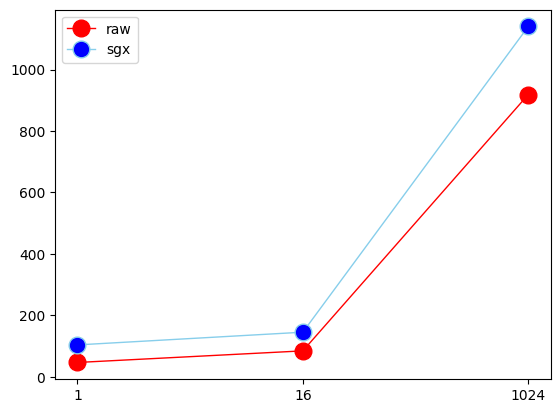

/var/folders/fz/lvlmmr5j7y100mbrz_71t22w0000gn/T/ipykernel_12259/1111661987.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[label] = df['Avg Time'] * 1000000
/var/folders/fz/lvlmmr5j7y100mbrz_71t22w0000gn/T/ipykernel_12259/1111661987.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[label] = df['Avg Time'] * 1000000


   Model  Threads  Batch Size  Min Time  Max Time  Avg Time      raw
9    cnn        4           1  0.000224  0.000294  0.000237    236.8
10   cnn        4          16  0.000410  0.000477  0.000422    421.6
11   cnn        4        1024  0.007093  0.027125  0.016575  16574.9
  Model  Batch Size  Min Time  Max Time  Avg Time      sgx
3   cnn           1  0.000502  0.000565  0.000512    511.6
4   cnn          16  0.000738  0.000855  0.000758    758.2
5   cnn        1024  0.016084  0.026051  0.017218  17217.8


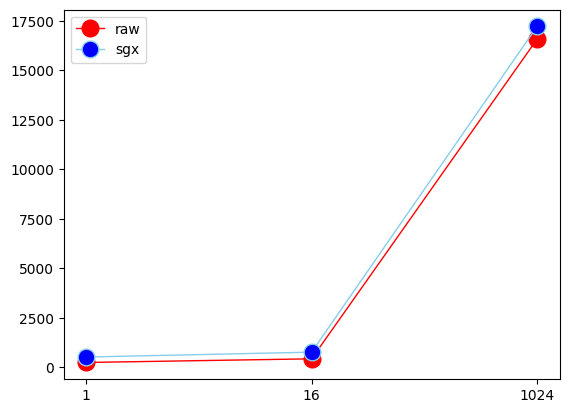

In [190]:
plotComparisonGraph(4,'mlp')
plotComparisonGraph(4,'cnn')

## Thread 16

   Model  Threads  Batch Size  Min Time  Max Time  Avg Time    raw
12   mlp       16           1  0.000040  0.000075  0.000042   41.8
13   mlp       16          16  0.000073  0.000089  0.000075   75.3
14   mlp       16        1024  0.000530  0.001018  0.000685  684.7
  Model  Batch Size  Min Time  Max Time  Avg Time    sgx
0   mlp           1  0.000098  0.000127  0.000101  101.3
1   mlp          16  0.000127  0.000145  0.000131  131.1
2   mlp        1024  0.000613  0.001097  0.000876  876.0


/var/folders/fz/lvlmmr5j7y100mbrz_71t22w0000gn/T/ipykernel_12259/1111661987.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[label] = df['Avg Time'] * 1000000
/var/folders/fz/lvlmmr5j7y100mbrz_71t22w0000gn/T/ipykernel_12259/1111661987.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[label] = df['Avg Time'] * 1000000


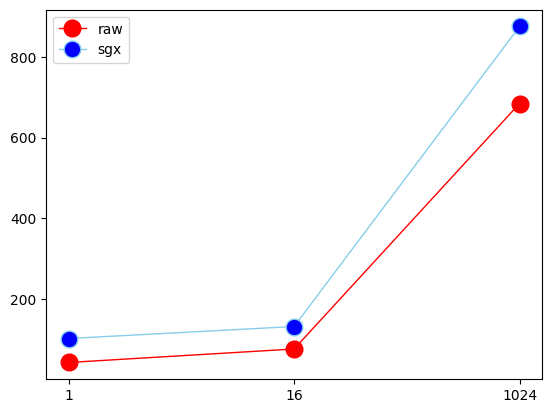

/var/folders/fz/lvlmmr5j7y100mbrz_71t22w0000gn/T/ipykernel_12259/1111661987.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[label] = df['Avg Time'] * 1000000
/var/folders/fz/lvlmmr5j7y100mbrz_71t22w0000gn/T/ipykernel_12259/1111661987.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[label] = df['Avg Time'] * 1000000


   Model  Threads  Batch Size  Min Time  Max Time  Avg Time     raw
15   cnn       16           1  0.000544  0.001456  0.000635   635.1
16   cnn       16          16  0.000340  0.000578  0.000358   357.7
17   cnn       16        1024  0.003152  0.012755  0.008705  8705.3
  Model  Batch Size  Min Time  Max Time  Avg Time      sgx
3   cnn           1  0.006207  0.017656  0.007432   7431.9
4   cnn          16  0.000715  0.001046  0.000782    781.8
5   cnn        1024  0.005937  0.021040  0.012396  12395.7


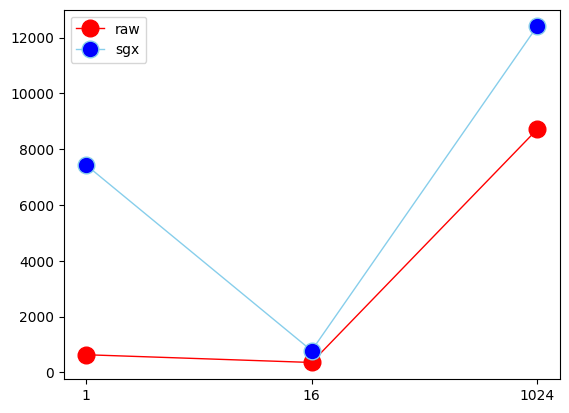

In [191]:
plotComparisonGraph(16,'mlp')
plotComparisonGraph(16,'cnn')

# Performance Comparison (with Threads)

## Batch Size: 1

   Model  Threads  Batch Size  Min Time  Max Time  Avg Time     raw
3    cnn        1           1  0.000227  0.000300  0.000237   236.7
9    cnn        4           1  0.000224  0.000294  0.000237   236.8
15   cnn       16           1  0.000544  0.001456  0.000635   635.1
21   cnn       32           1  0.001568  0.005557  0.001971  1970.7
  Model  Batch Size  Min Time  Max Time  Avg Time     sgx  Threads
3   cnn           1  0.000246  0.000343  0.000259   259.1        1
3   cnn           1  0.000502  0.000565  0.000512   511.6        4
3   cnn           1  0.006207  0.017656  0.007432  7431.9       16


/var/folders/fz/lvlmmr5j7y100mbrz_71t22w0000gn/T/ipykernel_12259/1111661987.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[label] = df['Avg Time'] * 1000000
/var/folders/fz/lvlmmr5j7y100mbrz_71t22w0000gn/T/ipykernel_12259/1111661987.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[label] = df['Avg Time'] * 1000000
/var/folders/fz/lvlmmr5j7y100mbrz_71t22w0000gn/T/ipykernel_12259/1111661987.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

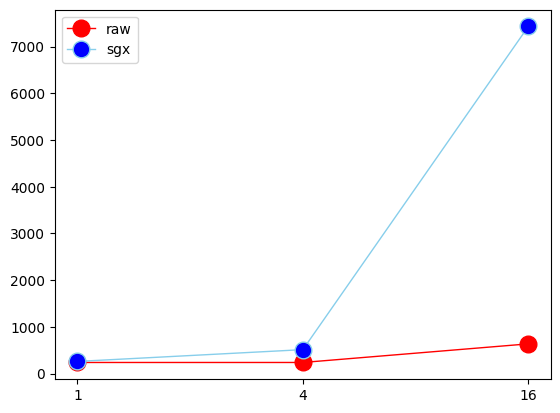

/var/folders/fz/lvlmmr5j7y100mbrz_71t22w0000gn/T/ipykernel_12259/1111661987.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[label] = df['Avg Time'] * 1000000
/var/folders/fz/lvlmmr5j7y100mbrz_71t22w0000gn/T/ipykernel_12259/1111661987.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[label] = df['Avg Time'] * 1000000
/var/folders/fz/lvlmmr5j7y100mbrz_71t22w0000gn/T/ipykernel_12259/1111661987.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

   Model  Threads  Batch Size  Min Time  Max Time  Avg Time   raw
0    mlp        1           1  0.000056  0.000120  0.000063  62.5
6    mlp        4           1  0.000041  0.000077  0.000046  46.3
12   mlp       16           1  0.000040  0.000075  0.000042  41.8
18   mlp       32           1  0.000046  0.000069  0.000049  49.1
  Model  Batch Size  Min Time  Max Time  Avg Time    sgx  Threads
0   mlp           1  0.000049  0.000081  0.000053   52.7        1
0   mlp           1  0.000100  0.000127  0.000103  103.5        4
0   mlp           1  0.000098  0.000127  0.000101  101.3       16


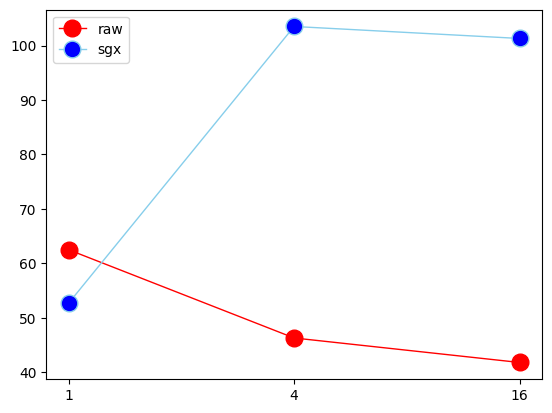

In [192]:
plotComparisonGraph_Thread( 1,'cnn')
plotComparisonGraph_Thread( 1,'mlp')

## Batch Size: 16

   Model  Threads  Batch Size  Min Time  Max Time  Avg Time    raw
4    cnn        1          16  0.000706  0.001158  0.000734  733.8
10   cnn        4          16  0.000410  0.000477  0.000422  421.6
16   cnn       16          16  0.000340  0.000578  0.000358  357.7
22   cnn       32          16  0.000389  0.000576  0.000405  404.6
  Model  Batch Size  Min Time  Max Time  Avg Time    sgx  Threads
4   cnn          16  0.000779  0.000900  0.000812  812.4        1
4   cnn          16  0.000738  0.000855  0.000758  758.2        4
4   cnn          16  0.000715  0.001046  0.000782  781.8       16


/var/folders/fz/lvlmmr5j7y100mbrz_71t22w0000gn/T/ipykernel_12259/1111661987.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[label] = df['Avg Time'] * 1000000
/var/folders/fz/lvlmmr5j7y100mbrz_71t22w0000gn/T/ipykernel_12259/1111661987.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[label] = df['Avg Time'] * 1000000
/var/folders/fz/lvlmmr5j7y100mbrz_71t22w0000gn/T/ipykernel_12259/1111661987.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

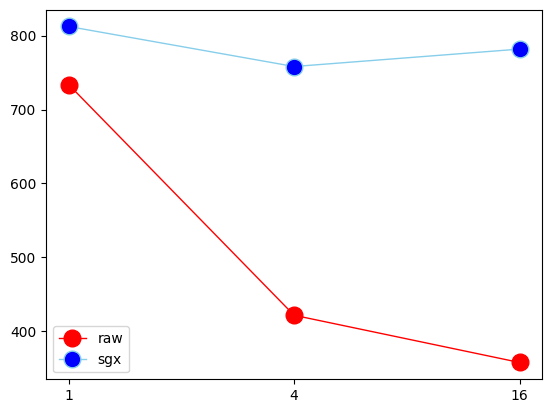

/var/folders/fz/lvlmmr5j7y100mbrz_71t22w0000gn/T/ipykernel_12259/1111661987.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[label] = df['Avg Time'] * 1000000
/var/folders/fz/lvlmmr5j7y100mbrz_71t22w0000gn/T/ipykernel_12259/1111661987.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[label] = df['Avg Time'] * 1000000
/var/folders/fz/lvlmmr5j7y100mbrz_71t22w0000gn/T/ipykernel_12259/1111661987.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

   Model  Threads  Batch Size  Min Time  Max Time  Avg Time    raw
1    mlp        1          16  0.000114  0.000140  0.000124  124.4
7    mlp        4          16  0.000081  0.000097  0.000084   84.1
13   mlp       16          16  0.000073  0.000089  0.000075   75.3
19   mlp       32          16  0.000073  0.000094  0.000076   75.8
  Model  Batch Size  Min Time  Max Time  Avg Time    sgx  Threads
1   mlp          16  0.000115  0.000199  0.000125  125.5        1
1   mlp          16  0.000136  0.000180  0.000145  144.9        4
1   mlp          16  0.000127  0.000145  0.000131  131.1       16


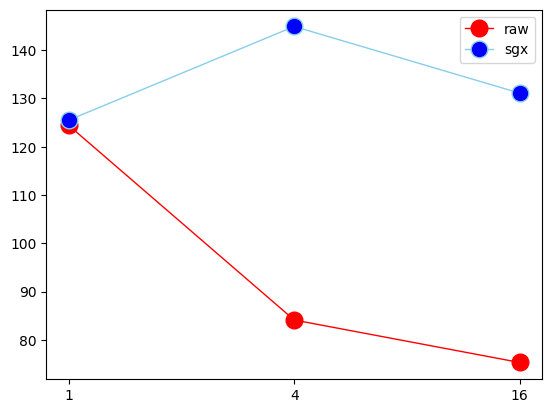

In [193]:
plotComparisonGraph_Thread( 16,'cnn')
plotComparisonGraph_Thread( 16,'mlp')

## Batch Size: 1024

   Model  Threads  Batch Size  Min Time  Max Time  Avg Time      raw
5    cnn        1        1024  0.020067  0.054651  0.046661  46660.5
11   cnn        4        1024  0.007093  0.027125  0.016575  16574.9
17   cnn       16        1024  0.003152  0.012755  0.008705   8705.3
23   cnn       32        1024  0.004510  0.016609  0.011297  11296.6
  Model  Batch Size  Min Time  Max Time  Avg Time      sgx  Threads
5   cnn        1024  0.025623  0.091179  0.043476  43476.2        1
5   cnn        1024  0.016084  0.026051  0.017218  17217.8        4
5   cnn        1024  0.005937  0.021040  0.012396  12395.7       16


/var/folders/fz/lvlmmr5j7y100mbrz_71t22w0000gn/T/ipykernel_12259/1111661987.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[label] = df['Avg Time'] * 1000000
/var/folders/fz/lvlmmr5j7y100mbrz_71t22w0000gn/T/ipykernel_12259/1111661987.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[label] = df['Avg Time'] * 1000000
/var/folders/fz/lvlmmr5j7y100mbrz_71t22w0000gn/T/ipykernel_12259/1111661987.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

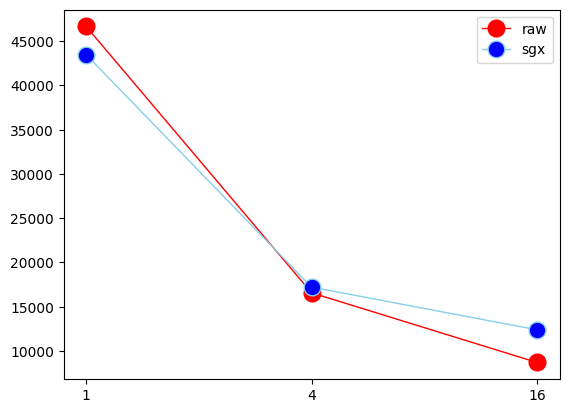

/var/folders/fz/lvlmmr5j7y100mbrz_71t22w0000gn/T/ipykernel_12259/1111661987.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[label] = df['Avg Time'] * 1000000
/var/folders/fz/lvlmmr5j7y100mbrz_71t22w0000gn/T/ipykernel_12259/1111661987.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[label] = df['Avg Time'] * 1000000
/var/folders/fz/lvlmmr5j7y100mbrz_71t22w0000gn/T/ipykernel_12259/1111661987.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

   Model  Threads  Batch Size  Min Time  Max Time  Avg Time     raw
2    mlp        1        1024  0.000869  0.001590  0.001391  1391.1
8    mlp        4        1024  0.000584  0.001581  0.000919   918.7
14   mlp       16        1024  0.000530  0.001018  0.000685   684.7
20   mlp       32        1024  0.000467  0.004954  0.000706   706.4
  Model  Batch Size  Min Time  Max Time  Avg Time     sgx  Threads
2   mlp        1024  0.000908  0.001641  0.001470  1469.8        1
2   mlp        1024  0.000756  0.001790  0.001140  1140.2        4
2   mlp        1024  0.000613  0.001097  0.000876   876.0       16


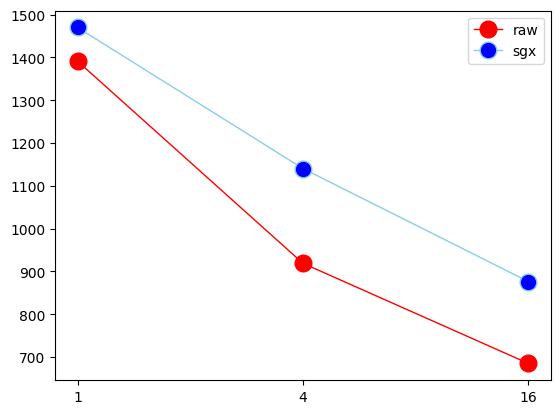

In [194]:
plotComparisonGraph_Thread( 1024,'cnn')
plotComparisonGraph_Thread( 1024,'mlp')